In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from ipywidgets import interact
import scipy.stats as stats

In [94]:
# Load in csv
athelete_merged_df = pd.read_csv("Clean_data.csv")
athelete_merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Host_Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,United Kingdom
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,175.0,71.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,Canada


In [95]:
# Function to update the pie chart based on selected year
def update_pie_chart(year):
    # Filter the DataFrame based on the selected year
    filtered_df = athelete_merged_df[athelete_merged_df['Year'] == year]
    
    # Group the data by some category (e.g., 'Sport') and count the occurrences
    data = filtered_df['Sex'].value_counts()
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sports Distribution in {year}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show() 

# Get unique years from the DataFrame
years = np.sort(athelete_merged_df['Year'].unique())
years

# Create a slider widget for selecting years
interact(update_pie_chart, year=years)

interactive(children=(Dropdown(description='year', options=(1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 19…

<function __main__.update_pie_chart(year)>

In [96]:
# Number of participants grouped by Sex, Year and Medal
winners_df = athelete_merged_df[athelete_merged_df['Medal'] !='DNW'].groupby(['Year', 'Sex']).size().reset_index(name='count')
winners_df.head()


,Year,Sex,count
0,1896,M,143
1,1900,F,13
2,1900,M,591
3,1904,F,10
4,1904,M,476


In [97]:
x_axis_data = winners_df['Year']
male_df = winners_df[winners_df['Sex']=='M']
female_df = winners_df[winners_df['Sex']=='F']
#male_df

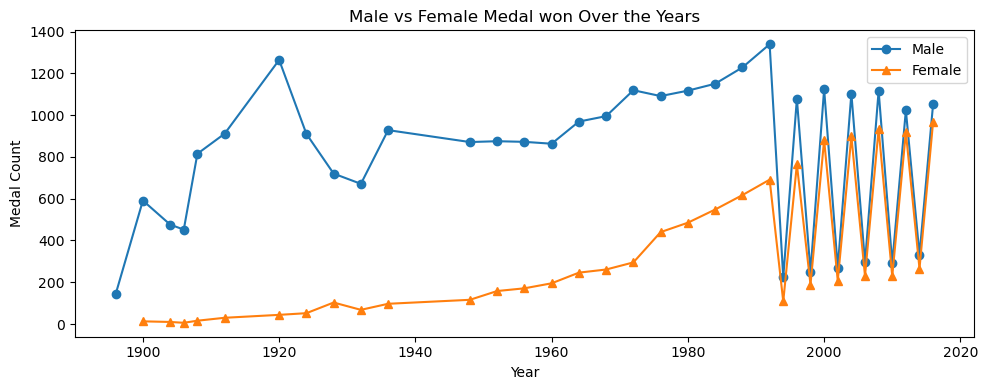

In [98]:
# Create a plot for male vs female medal won over the years
plt.figure(figsize=(10, 4))
plt.plot(male_df['Year'], male_df['count'], marker='o', label='Male')
plt.plot(female_df['Year'], female_df['count'], marker='^', label='Female')
plt.title('Male vs Female Medal won Over the Years')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend()
plt.tight_layout()
plt.show()

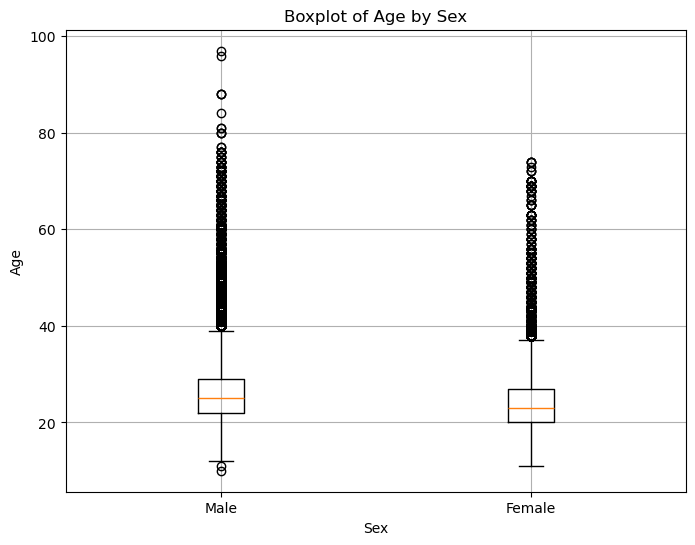

In [99]:
# Generate a box plot that shows the distrubution of the total male and female participants.
athelete_clean_df = athelete_merged_df[athelete_merged_df['Age'].notnull()]
plt.figure(figsize=(8, 6))

plt.boxplot([athelete_clean_df[athelete_clean_df['Sex'] == 'M']['Age'], 
             athelete_clean_df[athelete_clean_df['Sex'] == 'F']['Age']], 
            labels=['Male', 'Female'])

# Add labels and title
plt.title('Boxplot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.xticks(rotation=0)
plt.grid(None)
plt.show()

(array([   85.,   198.,   263.,   365.,   393.,   924.,  1518.,  1996.,
         2908.,  3355.,  6453.,  8340., 11157.,  9197., 12486., 16564.,
        15656., 76576., 11345., 14710., 16929., 14594., 11199.,  7950.,
         6822.,  6368.,  4161.,  2515.,  3034.]),
 array([140., 142., 144., 146., 148., 150., 152., 154., 156., 158., 160.,
        162., 164., 166., 168., 170., 172., 174., 176., 178., 180., 182.,
        184., 186., 188., 190., 192., 194., 196., 198.]),
 <BarContainer object of 29 artists>)

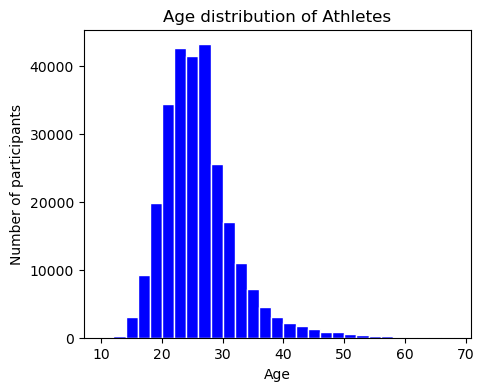

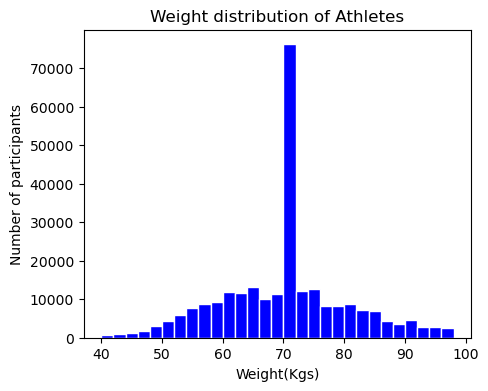

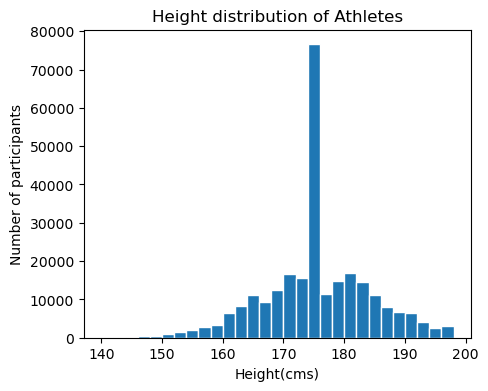

In [100]:
# Age Distribution of Participants
plt.figure(figsize=(5,4))
plt.title ("Age distribution of Athletes")
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athelete_merged_df['Age'], bins = np.arange(10,70,2), color = 'blue',edgecolor='white')

# Weight Distribution of Athletes:

plt.figure(figsize=(5,4))
plt.title ("Weight distribution of Athletes")
plt.xlabel('Weight(Kgs)')
plt.ylabel('Number of participants')
plt.hist(athelete_merged_df['Weight'], bins = np.arange(40,100,2),color = 'blue', edgecolor='white')

# Height Distribution of Athlete:

plt.figure(figsize=(5,4))
plt.title ("Height distribution of Athletes")
plt.xlabel('Height(cms)')
plt.ylabel('Number of participants')
plt.hist(athelete_merged_df['Height'], bins = np.arange(140,200,2),edgecolor='white')

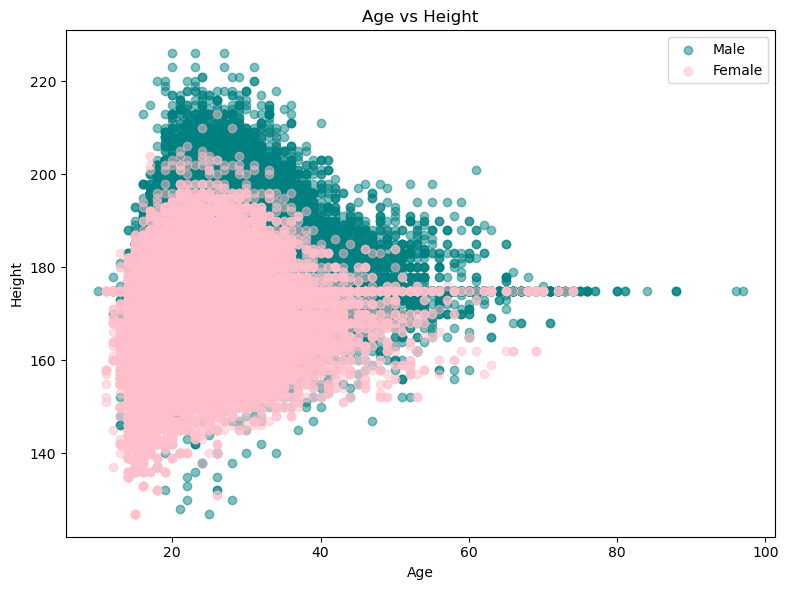

In [101]:
category_male = athelete_merged_df[athelete_merged_df['Sex'] == 'M']
category_female = athelete_merged_df[athelete_merged_df['Sex'] == 'F']

# Plot the scatter plot with different markers or colors for each category
plt.figure(figsize=(8, 6))
plt.scatter(category_male['Age'], category_male['Height'], color='teal', label='Male', alpha = 0.5)
plt.scatter(category_female['Age'], category_female['Height'], color='pink', label='Female',  alpha = 0.5)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Age vs Height')
plt.legend()

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

In [102]:
athelete_winners_df = athelete_merged_df[athelete_merged_df['Medal']!='DNW']
athelete_gold_winners_summer_df = athelete_winners_df[(athelete_winners_df['Season']=='Summer') & (athelete_winners_df['Medal']=='Gold')]
athelete_gold_winners_winter_df = athelete_winners_df[(athelete_winners_df['Season']=='Winter') & (athelete_winners_df['Medal']=='Gold')]

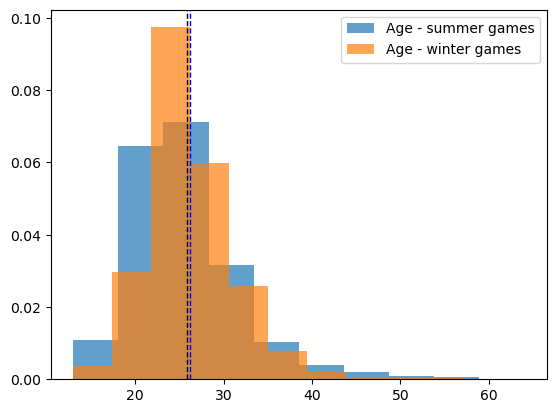

In [103]:
plt.hist(athelete_gold_winners_summer_df['Age'], 10, density=True, alpha=0.7, label="Age - summer games")
plt.hist(athelete_gold_winners_winter_df['Age'], 10, density=True, alpha=0.7, label="Age - winter games")
plt.axvline(athelete_gold_winners_summer_df['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(athelete_gold_winners_winter_df['Age'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend()  

In [104]:
stats.ttest_ind(athelete_gold_winners_summer_df['Age'], athelete_gold_winners_winter_df['Age'], equal_var=False)

TtestResult(statistic=-2.3759958380176127, pvalue=0.01756470839218583, df=2971.387328889996)

In [105]:
athelete_non_winners_df = athelete_merged_df[athelete_merged_df['Medal']=='DNW']

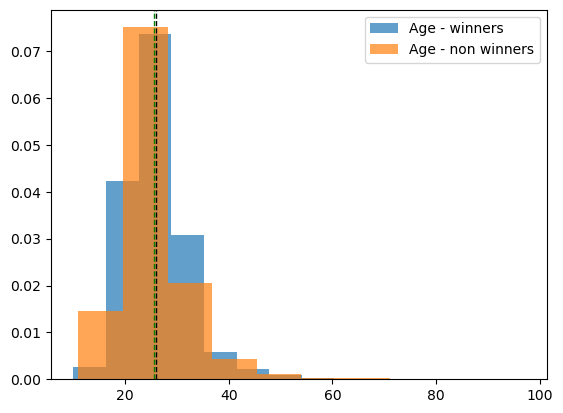

In [106]:
plt.hist(athelete_winners_df['Age'], 10, density=True, alpha=0.7, label="Age - winners")
plt.hist(athelete_non_winners_df['Age'], 10, density=True, alpha=0.7, label="Age - non winners")
plt.axvline(athelete_winners_df['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(athelete_non_winners_df['Age'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.legend()  

In [107]:
stats.ttest_ind(athelete_winners_df['Age'], athelete_non_winners_df['Age'], equal_var=False)

TtestResult(statistic=12.888056033762519, pvalue=5.937509347573634e-38, df=57069.83641086807)

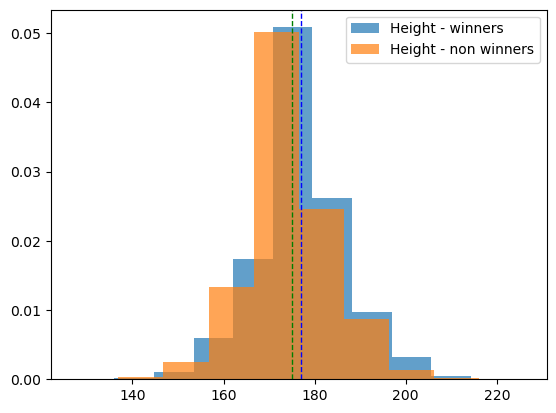

In [108]:
plt.hist(athelete_winners_df['Height'], 10, density=True, alpha=0.7, label="Height - winners")
plt.hist(athelete_non_winners_df['Height'], 10, density=True, alpha=0.7, label="Height - non winners")
plt.axvline(athelete_winners_df['Height'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(athelete_non_winners_df['Height'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.legend()  

In [109]:
stats.ttest_ind(athelete_winners_df['Height'], athelete_non_winners_df['Height'], equal_var=False)

TtestResult(statistic=38.88991510449231, pvalue=0.0, df=52791.62079967958)

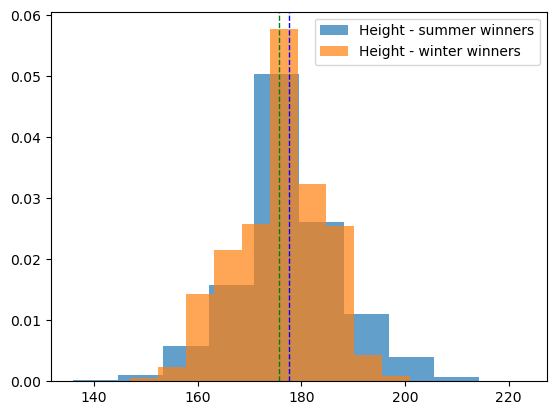

In [110]:
plt.hist(athelete_gold_winners_summer_df['Height'], 10, density=True, alpha=0.7, label="Height - summer winners")
plt.hist(athelete_gold_winners_winter_df['Height'], 10, density=True, alpha=0.7, label="Height - winter winners")
plt.axvline(athelete_gold_winners_summer_df['Height'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(athelete_gold_winners_winter_df['Height'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.legend()  

In [111]:
stats.ttest_ind(athelete_gold_winners_summer_df['Height'], athelete_gold_winners_winter_df['Height'], equal_var=False)

TtestResult(statistic=8.536957957088065, pvalue=2.18717576211361e-17, df=2904.5954934088863)

In [112]:
#Medal winners
gold_athletics = athelete_winners_df[(athelete_winners_df['Sport']=='Athletics') & (athelete_winners_df['Medal']=='Gold')]
silver_athletics = athelete_winners_df[(athelete_winners_df['Sport']=='Athletics') & (athelete_winners_df['Medal']=='Silver')]
bronze_athletics = athelete_winners_df[(athelete_winners_df['Sport']=='Athletics') & (athelete_winners_df['Medal']=='Bronze')]
gold_athletics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Host_Country
620,359,Andrey Khakimovich Abduvaliyev,M,26.0,190.0,125.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,Gold,Russia,Spain
720,411,Gezahgne Abera,M,22.0,166.0,58.0,Ethiopia,ETH,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Marathon,Gold,Ethiopia,Australia
787,454,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.0,68.0,United States,United States of America,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Gold,United States of America,United States of America
915,519,Harold Maurice Abrahams,M,24.0,183.0,75.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold,United Kingdom,France
1511,836,Platt Adams,M,27.0,188.0,78.0,United States,United States of America,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Standing High Jump,Gold,United States of America,Sweden


In [113]:
#non winners
athelete_non_winners_df = athelete_merged_df[(athelete_merged_df['Medal']=='DNW') & (athelete_merged_df['Sport']=='Athletics')]
athelete_non_winners_df =  athelete_non_winners_df.dropna(how='any')
athelete_non_winners_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Host_Country
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,71.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,DNW,Netherlands,United States of America
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,71.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,DNW,Netherlands,United States of America
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,DNW,Finland,Australia
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,DNW,Estonia,Germany
95,32,Olav Augunson Aarnes,M,23.0,175.0,71.0,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,DNW,Norway,Sweden


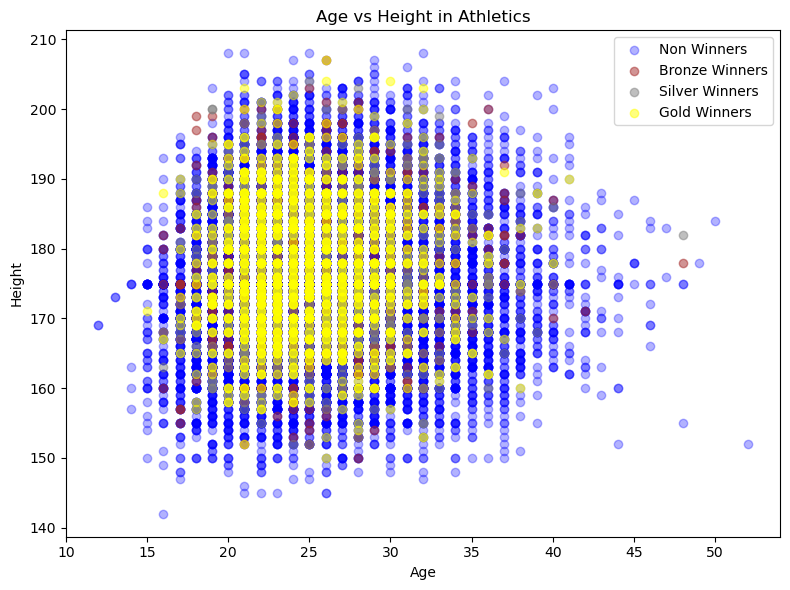

In [114]:
# Plot the scatter plot with different markers or colors for each category
plt.figure(figsize=(8, 6))
plt.scatter(athelete_non_winners_df['Age'], athelete_non_winners_df['Height'], color='blue', label='Non Winners', alpha = 0.3)
plt.scatter(bronze_athletics['Age'], bronze_athletics['Height'], color='brown', label='Bronze Winners', alpha = 0.5)
plt.scatter(silver_athletics['Age'], silver_athletics['Height'], color='grey', label='Silver Winners', alpha = 0.5)
plt.scatter(gold_athletics['Age'], gold_athletics['Height'], color='yellow', label='Gold Winners', alpha = 0.5)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Age vs Height in Athletics')
plt.legend()

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

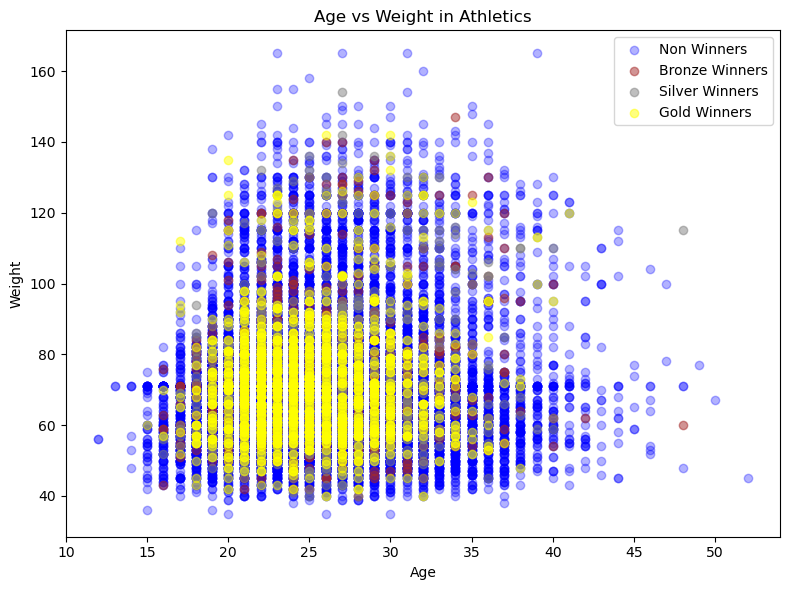

In [115]:
# Plot the scatter plot with different markers or colors for each category
plt.figure(figsize=(8, 6))
plt.scatter(athelete_non_winners_df['Age'], athelete_non_winners_df['Weight'], color='blue', label='Non Winners', alpha = 0.3)
plt.scatter(bronze_athletics['Age'], bronze_athletics['Weight'], color='brown', label='Bronze Winners', alpha = 0.5)
plt.scatter(silver_athletics['Age'], silver_athletics['Weight'], color='grey', label='Silver Winners', alpha = 0.5)
plt.scatter(gold_athletics['Age'], gold_athletics['Weight'], color='yellow', label='Gold Winners', alpha = 0.5)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age vs Weight in Athletics')
plt.legend()

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

In [116]:
stats.ttest_1samp(gold_athletics['Age'], athelete_non_winners_df['Age'].mean())

TtestResult(statistic=-1.8552099630943273, pvalue=0.06378606398931093, df=1338)

In [117]:
stats.ttest_1samp(gold_athletics['Height'], athelete_non_winners_df['Height'].mean())

TtestResult(statistic=7.696365351370749, pvalue=2.704067498681744e-14, df=1338)

In [118]:
stats.ttest_1samp(gold_athletics['Weight'], athelete_non_winners_df['Weight'].mean())

TtestResult(statistic=5.8277406015899595, pvalue=7.031131445447801e-09, df=1338)

In [119]:
stats.ttest_ind(gold_athletics['Height'], athelete_non_winners_df['Height'], equal_var=False)

TtestResult(statistic=7.5663339381026615, pvalue=6.834138494766401e-14, df=1432.3087536976154)

In [120]:
stats.ttest_ind(gold_athletics['Age'], athelete_non_winners_df['Age'], equal_var=False)

TtestResult(statistic=-1.812682379415173, pvalue=0.07008502489068548, df=1467.9245863967972)

In [121]:
stats.ttest_ind(gold_athletics['Weight'], athelete_non_winners_df['Weight'], equal_var=False)

TtestResult(statistic=5.736987393803433, pvalue=1.1753633802274705e-08, df=1424.6373665908104)